# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [31]:
#Type your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [32]:
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]

df = pd.read_csv('/content/sample_data/hasil_clustering_inverse.csv')


In [33]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Bin,CustomerAge_Bin,Cluster,Target
0,14.09,680.0,1.0,36.0,14.0,0.0,70.0,0.0,81.0,1.0,5112.21,105.0,1,1,0,0
1,376.24,1178.0,1.0,15.0,51.0,0.0,68.0,0.0,141.0,1.0,13758.91,192.0,0,1,2,2
2,126.29,1262.0,1.0,23.0,8.0,2.0,19.0,3.0,56.0,1.0,1122.35,41.0,2,2,2,2
3,184.50,818.0,1.0,33.0,1.0,2.0,26.0,3.0,25.0,1.0,8569.06,163.0,2,2,0,0
4,13.45,1939.0,1.0,1.0,90.0,2.0,45.0,3.0,198.0,1.0,7429.40,16.0,1,0,1,1


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [34]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.


X = df.drop('Target', axis=1)
y = df['Target']

# Menggunakan train_test_split() untuk melakukan pembagian dataset.
df_train, df_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Jumlah data latih: {df_train.shape[0]}, Jumlah data uji: {df_test.shape[0]}")


Jumlah data latih: 2011, Jumlah data uji: 503


# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [35]:
# Buatlah model klasifikasi menggunakan Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Latih model menggunakan data yang sudah dipisah.
model.fit(df_train, y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
# Menyimpan Model

joblib.dump(model, 'decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [37]:
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.

# Buat model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Latih model menggunakan data yang sudah dipisah
rf_model.fit(df_train, y_train)

print("Random Forest model trained successfully.")

Random Forest model trained successfully.


Evaluasi Model Decision Tree:
Akurasi : 1.0000
Presisi : 1.0000
Recall  : 1.0000
F1-Score: 1.0000


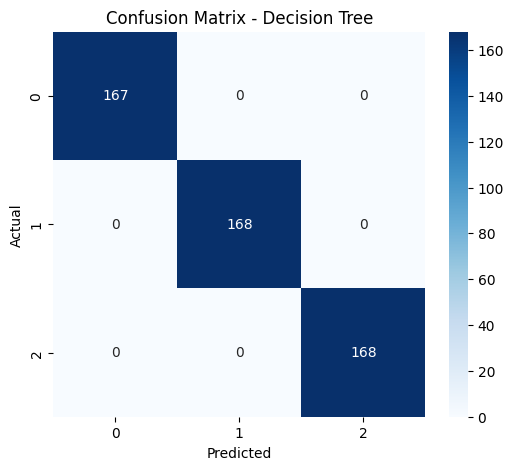

------------------------------
Evaluasi Model Random Forest:
Akurasi : 1.0000
Presisi : 1.0000
Recall  : 1.0000
F1-Score: 1.0000


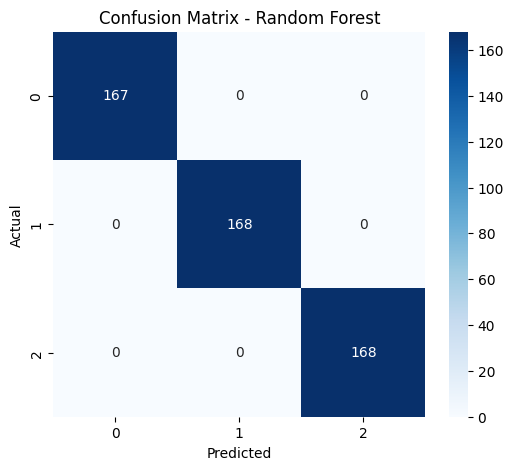

------------------------------


In [38]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    print(f"Evaluasi Model {model_name}:")
    print(f"Akurasi : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Presisi : {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall  : {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    print("-" * 30)

# Evaluasi kedua model sekaligus
evaluate_model(model, df_test, y_test, "Decision Tree")
evaluate_model(rf_model, df_test, y_test, "Random Forest")

In [39]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
import joblib
joblib.dump(rf_model, 'explore_RandomForest_classification.h5')

['explore_RandomForest_classification.h5']

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [28]:
# Lakukan Hyperparameter Tuning dan Latih ulang.
# Lakukan dalam satu cell ini saja.


# Tentukan parameter grid yang akan dicoba
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Buat model Random Forest
rf = RandomForestClassifier(random_state=42)

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Lakukan tuning pada data latih
grid_search.fit(df_train, y_train)

# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

# Latih ulang model dengan parameter terbaik
best_rf_model = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Parameter terbaik: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Evaluasi Model Random Forest (Tuned):
Akurasi: 1.0000
Presisi: [1. 1. 1.]
Recall: [1. 1. 1.]
F1-Score: [1. 1. 1.]
Confusion Matrix:


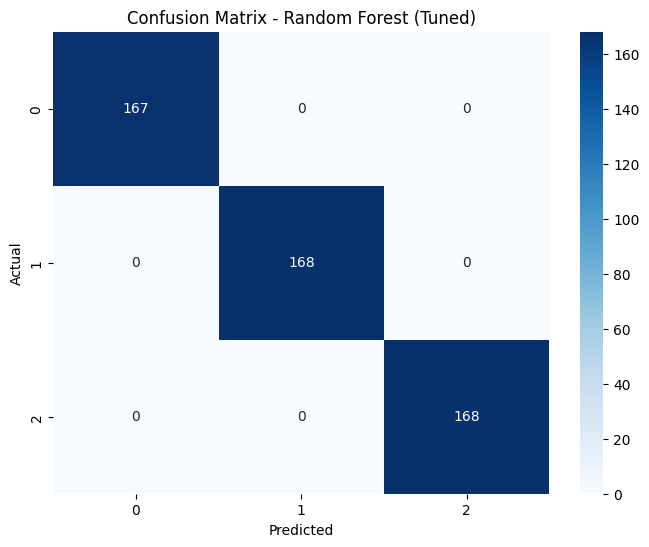

In [29]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi menggunakan model Random Forest terbaik hasil tuning
y_pred_tuned_rf = best_rf_model.predict(df_test)

# Evaluasi model Random Forest terbaik hasil tuning
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
precision_tuned_rf = precision_score(y_test, y_pred_tuned_rf, average='weighted')
recall_tuned_rf = recall_score(y_test, y_pred_tuned_rf, average='weighted')
f1_tuned_rf = f1_score(y_test, y_pred_tuned_rf, average='weighted')
cm_tuned_rf = confusion_matrix(y_test, y_pred_tuned_rf)


print("Evaluasi Model Random Forest (Tuned):")
print(f"Akurasi: {accuracy_tuned_rf:.4f}")
print(f"Presisi: {precision_score(y_test, y_pred_tuned_rf, average=None)}")
print(f"Recall: {recall_score(y_test, y_pred_tuned_rf, average=None)}")
print(f"F1-Score: {f1_score(y_test, y_pred_tuned_rf, average=None)}")
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.show()

In [30]:
# Menyimpan Model hasil tuning
import joblib
joblib.dump(best_rf_model, 'tuning_classification.h5')

['tuning_classification.h5']

End of Code